In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import json

import seaborn as sns
import matplotlib.pyplot as plt



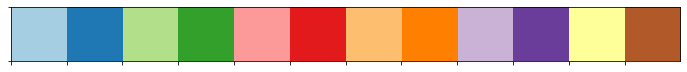

In [2]:
sns.palplot(sns.color_palette("Paired"))
plt.style.use('seaborn')

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
credito_df = pd.read_csv('desafio1.csv', index_col='RowNumber')

In [5]:
subm_json = pd.read_json('submission.json')

## Analise do Dataframe

In [6]:
credito_df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [7]:
credito_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 1 to 7000
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        7000 non-null   object 
 1   sobrenome                 7000 non-null   object 
 2   pontuacao_credito         7000 non-null   int64  
 3   estado_residencia         7000 non-null   object 
 4   genero                    7000 non-null   object 
 5   idade                     7000 non-null   int64  
 6   nivel_estabilidade        7000 non-null   int64  
 7   saldo_conta               7000 non-null   float64
 8   numero_produtos           7000 non-null   int64  
 9   possui_cartao_de_credito  7000 non-null   int64  
 10  membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 656.2+ KB


In [8]:
credito_df.corr()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
pontuacao_credito,1.000000,-0.002839,0.007233,0.009761,0.000996,-0.007987,0.033992
idade,-0.002839,1.000000,-0.002389,0.027459,-0.040531,-0.010335,0.093664
nivel_estabilidade,0.007233,-0.002389,1.000000,-0.020527,0.018088,0.036107,-0.029980
saldo_conta,0.009761,0.027459,-0.020527,1.000000,-0.303407,-0.019398,-0.006482
numero_produtos,0.000996,-0.040531,0.018088,-0.303407,1.000000,-0.007240,0.007005
possui_cartao_de_credito,-0.007987,-0.010335,0.036107,-0.019398,-0.007240,1.000000,-0.014564
membro_ativo,0.033992,0.093664,-0.029980,-0.006482,0.007005,-0.014564,1.000000


In [9]:
import ppscore
ppscore_matrix = ppscore.matrix(credito_df)

In [10]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

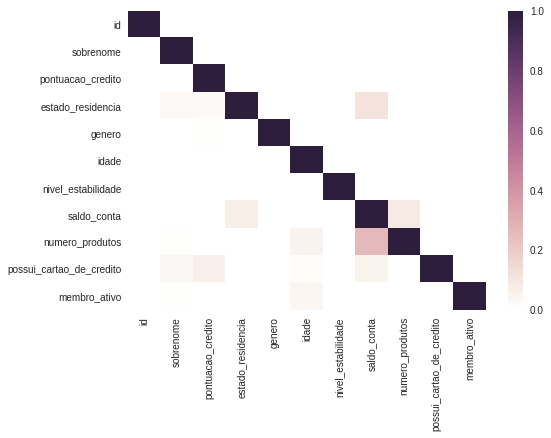

In [11]:
sns.heatmap(ppscore_matrix, cmap=cmap)

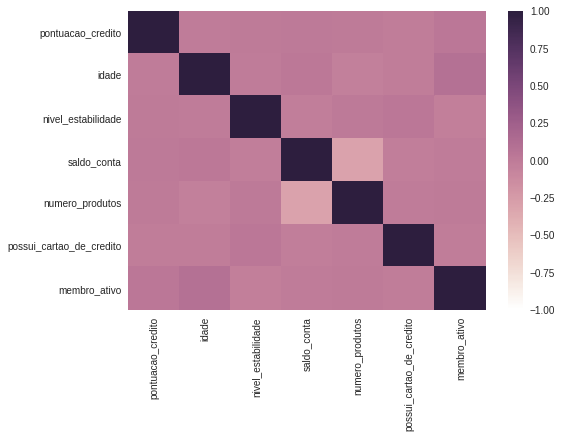

In [12]:
sns.heatmap(credito_df.corr(), vmin=-1, cmap=cmap)

## Analises estatisticas Media | Moda | Mediana | desvio padrão

### Qual a media, moda, mediana e desvio padrão de credito por estado?

#### Media

In [13]:
media_pontuacao_estado = credito_df.groupby(['estado_residencia']).mean()
media_pontuacao_estado = pd.DataFrame(media_pontuacao_estado['pontuacao_credito'])
media_pontuacao_estado.columns = ['media_pontuacao']
media_pontuacao_estado

,media_pontuacao
estado_residencia,
PR,648.961294
RS,651.105143
SC,649.537653


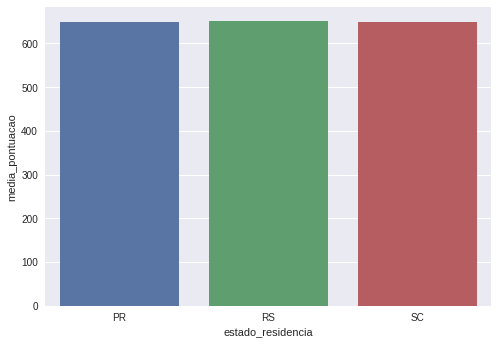

In [14]:
sns.barplot(x=media_pontuacao_estado.index, y=media_pontuacao_estado['media_pontuacao'])
plt.show()

#### Mediana

In [15]:
median_pontuacao_estado = credito_df.groupby(['estado_residencia']).median()['pontuacao_credito']
median_pontuacao_estado = pd.DataFrame(median_pontuacao_estado)
median_pontuacao_estado.columns = ['mediana_pontuacao']
median_pontuacao_estado

,mediana_pontuacao
estado_residencia,
PR,650
RS,650
SC,653


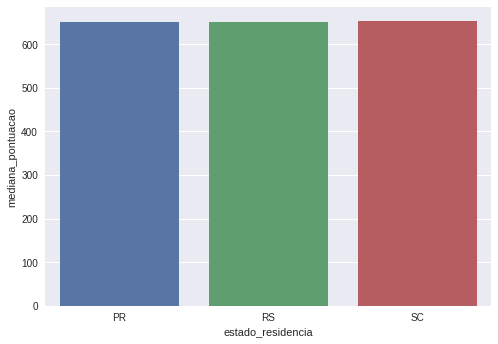

In [16]:
sns.barplot(x=median_pontuacao_estado.index, y=median_pontuacao_estado['mediana_pontuacao'])
plt.show()

#### moda

In [17]:
mode_pontuacao_estado = credito_df.groupby(['estado_residencia'])['pontuacao_credito'].apply(pd.Series.mode)
mode_pontuacao_estado = pd.DataFrame(mode_pontuacao_estado)
mode_pontuacao_estado.columns = ['moda_pontuacao']
mode_pontuacao_estado

,,moda_pontuacao
estado_residencia,,
PR,0,850
RS,0,850
SC,0,850


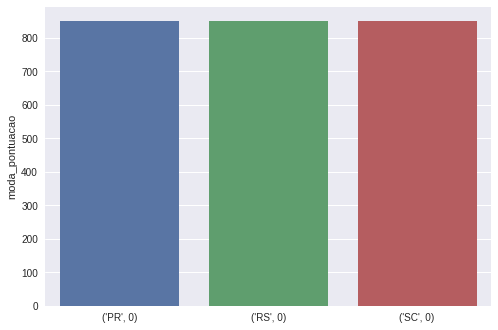

In [18]:
sns.barplot(x=mode_pontuacao_estado.index, y=mode_pontuacao_estado['moda_pontuacao'])
plt.show()

#### Desvio padrão

In [19]:
std_pontuacao_estado = credito_df.groupby(['estado_residencia'])['pontuacao_credito'].apply(sp.stats.tstd)
std_pontuacao_estado = pd.DataFrame(std_pontuacao_estado)
std_pontuacao_estado.columns = ['desvio_padrao_pontuacao']
std_pontuacao_estado

,desvio_padrao_pontuacao
estado_residencia,
PR,98.607186
RS,95.136598
SC,97.233493


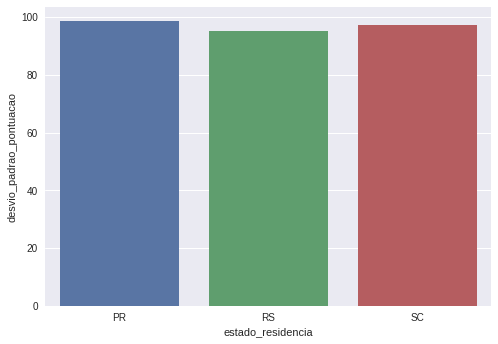

In [20]:
sns.barplot(x=std_pontuacao_estado.index, y=std_pontuacao_estado['desvio_padrao_pontuacao'])
plt.show()

### Salvando os dados no Json

In [21]:
subm_json_trans = subm_json.T
subm_json_trans.reset_index(inplace=True)

std_pontuacao_estado.reset_index(inplace=True)

subm_json_trans = subm_json_trans.join(std_pontuacao_estado.set_index('estado_residencia'), on='index', lsuffix='_drop')

In [22]:
media_pontuacao_estado.reset_index(inplace=True)
subm_json_trans = subm_json_trans.join(media_pontuacao_estado.set_index('estado_residencia'), on='index', lsuffix='drop')

In [23]:
mode_pontuacao_estado.reset_index(inplace=True)
subm_json_trans = subm_json_trans.join(mode_pontuacao_estado.set_index('estado_residencia'), on='index', lsuffix='drop')

In [24]:
median_pontuacao_estado.reset_index(inplace=True)
subm_json_trans = subm_json_trans.join(median_pontuacao_estado.set_index('estado_residencia'), on='index', lsuffix='drop')

In [26]:
submission = subm_json_trans[['index', 'media_pontuacao', 'moda_pontuacao', 'mediana_pontuacao', 'desvio_padrao_pontuacao']]
submission.columns = ['estado', 'media', 'moda', 'mediana', 'desvio_padrao']
submission.set_index('estado', inplace=True)

In [28]:
with open('submission.json', 'w') as file:
    file.write(json.dumps(submission.T.to_dict()))
